<table>
<tr>
<td width=15%><img src="../../img/UGA.png"></img></td>
<td><center><h1>Project n°3</h1></center></td>
<td width=15%><a href="https://team.inria.fr/tripop/team-members/" style="font-size: 16px; font-weight: bold">Florian Vincent</a> </td>
</tr>
</table>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Learning text classification

This project is heavily inspired from [Jigsaw's *Toxic Comments Classification* challenge](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview) on kaggle.
To avoid copy-pastings of foreign code, it will guide you towards specific tools to test and use.

## Overview of the project

Take a look at the *zip*ed csv data files by unzipping them (`for name in $(ls *.zip); do unzip $name; done;`).

Every comment in the train set is classified with a label in `{"toxic", "severe_toxic", "obscene", "threat", "insult", "identity hate"}`.
You will need to train multiple kind of models to identify those comments, and you will test them against the test dataset.

In [43]:
import pandas as pd

# Chargement des fichiers CSV
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_test_labels = pd.read_csv("test_labels.csv")

# Aperçu des cinq premières lignes de chaque dataset
print("**Aperçu des données d'entraînement :**")
print(data_train.head(), "\n")

print("**Aperçu des données de test :**")
print(data_test.head(), "\n")

print("**Aperçu des labels de test :**")
print(data_test_labels.head(), "\n")


**Aperçu des données d'entraînement :**
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0   

**Aperçu des données de test :**
                 id                                       comment_text
0  00001cee341fdb12

## Study the data

Representing textual data in an algebraic format (i.e. vectors & matrices) is not easy, but fortunately it has been quickly studied earlier in the lectures.

**Implement a word-vectorizer relying on simple counting for the textual data**

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# Sélection de la colonne contenant les commentaires
corpus = data_train["comment_text"]

# Initialisation du vectoriseur CountVectorizer
vectorizer = CountVectorizer()

# Transformation des commentaires en vecteurs de comptage
X = vectorizer.fit_transform(corpus)

# Sortie des dimensions
print(f"Dimensions de la matrice X (Commentaires x Vocabulaire) : {X.shape}\n")

# Affichage du vocabulaire (liste des mots)
print(f"**Exemple de mots du vocabulaire :** {vectorizer.get_feature_names_out()[:10]}...\n")

# Affichage de la matrice dense pour quelques commentaires
print("**Matrice de comptage (TF, Top 5 commentaires) :**\n")
print(X.toarray()[:5])



Dimensions de la matrice X (Commentaires x Vocabulaire) : (159571, 189775)

**Exemple de mots du vocabulaire :** ['00' '000' '0000' '00000' '000000' '0000000' '00000000' '0000000027'
 '00000001' '00000003']...

**Matrice de comptage (TF, Top 5 commentaires) :**

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Implement another vectorizing relying this time on the *tf-idf* metric. Use a pipeline if needed.**

In [45]:
## with the use of tf-idf the words thats re more accurate re less important so we wont have the redondant words when it comes to counting from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# The TfidfVectorizer: tokenazation  splits the text into smaller units called tokens (usually words)
# then vectorizer calculates the TF-IDF (Term Frequency-Inverse Document Frequency) value for each term in the corpus.
# which is the number of a token on the total number of all tokens  for term freq 
# Inverse Document Frequency or idf : is simply the log of the number of  documents or sentences thats containes the token (word)

# Pipeline avec  l'étape de TF-IDF
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000))  # Étape TF-IDF
])

# Charger le corpus
corpus1 = data_train["comment_text"]
corpus2 = data_test["comment_text"]
# Appliquer le pipeline
X_tfidf = pipeline.fit_transform(corpus1)
# Transformer les données de test avec le même vectoriseur (sans fit)
X_test_tfidf = pipeline.transform(corpus2)

# Afficher les dimensions et les vecteurs train 
print("Shape de X_train :", X_tfidf.shape)  #nbre of documents x nbre of tokens (words)
#print("TF-IDF Vectors (sparse matrix):\n", X_tfidf)  # Matrice TF-IDF au format sparse qui stocke uniquement les valeurs non nulles , le doc , le mots et la ponderation tf-idf

# Afficher les dimensions et les vecteurs test 
print("Shape de X_test :", X_test_tfidf.shape)  #nbre of documents x nbre of tokens (words)
#print("TF-IDF Vectors (sparse matrix):\n", X_test_tfidf)  # Matrice TF-IDF au format sparse qui stocke uniquement les valeurs non nulles , le doc , le mots et la ponderation tf-idf
# la matrice complète (dense):
#print("TF-IDF Vectors (dense):\n", X_tfidf.toarray()) # on voit plusieurs zero 
#print("Vocabulary:", pipeline.named_steps['tfidf'].get_feature_names_out())
#print("TF-IDF Vectors (dense):\n", X_tfidf.toarray())



Shape de X_train : (159571, 10000)
Shape de X_test : (153164, 10000)



One may wish to take a deeper look in the database by using various techniques.

**Find a suitable dimension reduction technique to study the structure of the data. Display your findings with visual means (you can use `seaborn`).**

In [46]:
##  one of he best methods to reduce the dimension to study the data is PCA principale composants analysis 
# on quantitatif variables .As words can take many values (string) its is the variables in question :)
from sklearn.decomposition import TruncatedSVD
#Pca  on sparse (non nulles ) 
svd = TruncatedSVD(n_components=2)
#fit and transform on the TF-IDF matrix but because it takes a lot of memory we can directly use the sparse matrix by 
# using truncatsvd .
res_pca= svd.fit_transform(X_tfidf)
print("Shape after dimensionality reduction:", res_pca.shape)
# create a data frame from svd result on tf_tfidf (PCA on  the sparse matrix )
df_pca = pd.DataFrame(res_pca, columns=['Dimension 1', 'Dimension 2'])

print(res_pca)


Shape after dimensionality reduction: (159571, 2)
[[ 0.1671037  -0.00734593]
 [ 0.05099571  0.00822821]
 [ 0.29391997 -0.02412488]
 ...
 [ 0.0372397  -0.01279074]
 [ 0.34208596 -0.04843753]
 [ 0.17767209  0.04838259]]


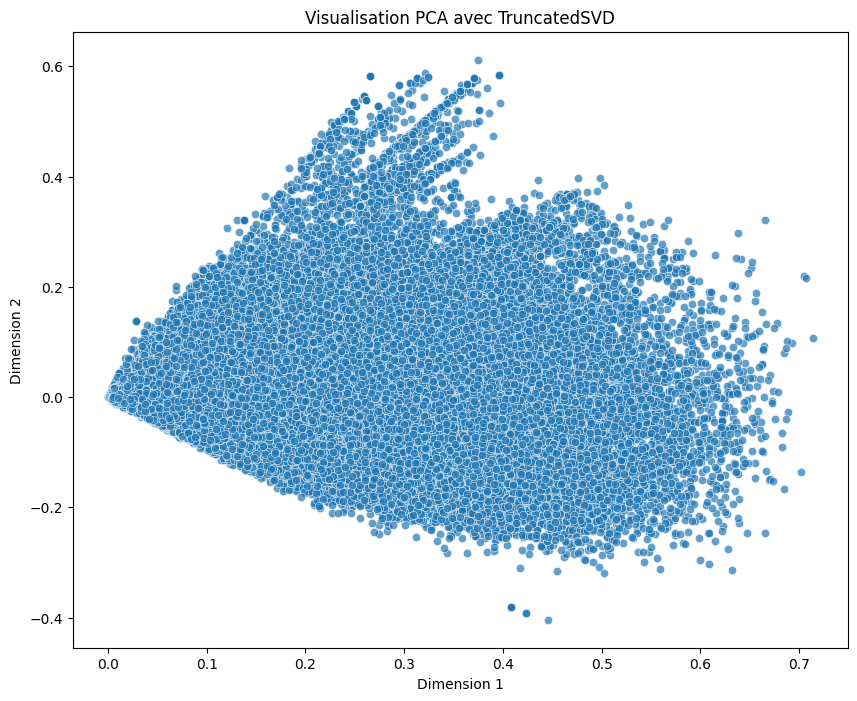

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# DISPLAY
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dimension 1',
    y='Dimension 2',  
    data=df_pca,  
    alpha=0.7  
)

plt.title('Visualisation PCA avec TruncatedSVD')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [48]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
n_clusters = 5  # Adjust based on the data
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(res_pca)

print("Cluster centers:", kmeans.cluster_centers_)


Cluster centers: [[ 0.22270635 -0.06818227]
 [ 0.34771046  0.27372534]
 [ 0.08915726  0.00318263]
 [ 0.39496785 -0.0655292 ]
 [ 0.22266697  0.09048714]]


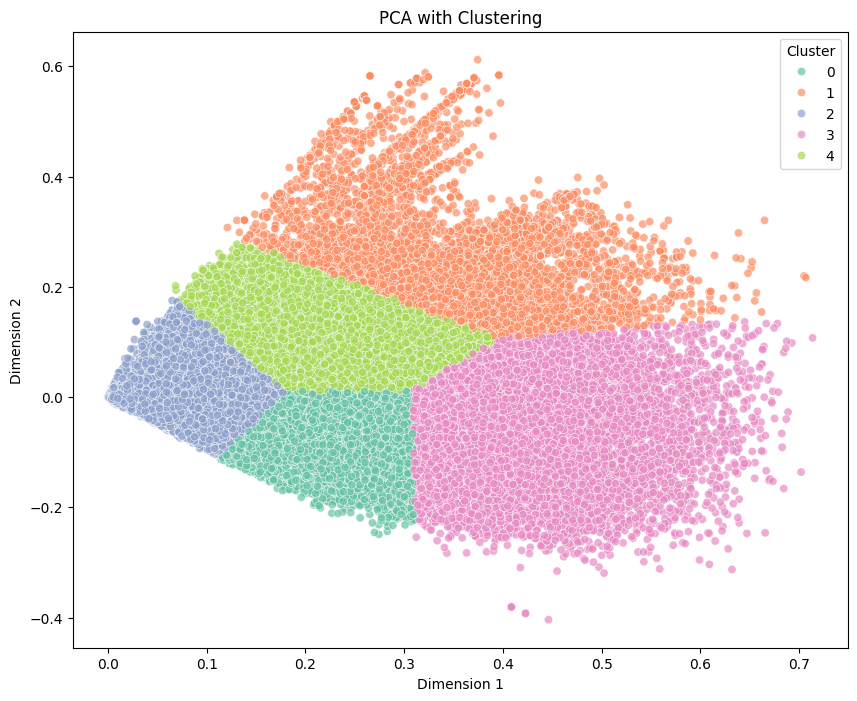

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dimension 1',
    y='Dimension 2',
    hue='Cluster',
    palette='Set2',  # Color palette for clusters
    data=df_pca,
    alpha=0.7
)

plt.title('PCA with Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()


In [50]:
# Nombre de catégories associées à chaque commentaire
data_train['label_count'] = data_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)

# Afficher un aperçu
print(data_train[['label_count']].value_counts())


label_count
0              143346
1                6360
3                4209
2                3480
4                1760
5                 385
6                  31
Name: count, dtype: int64


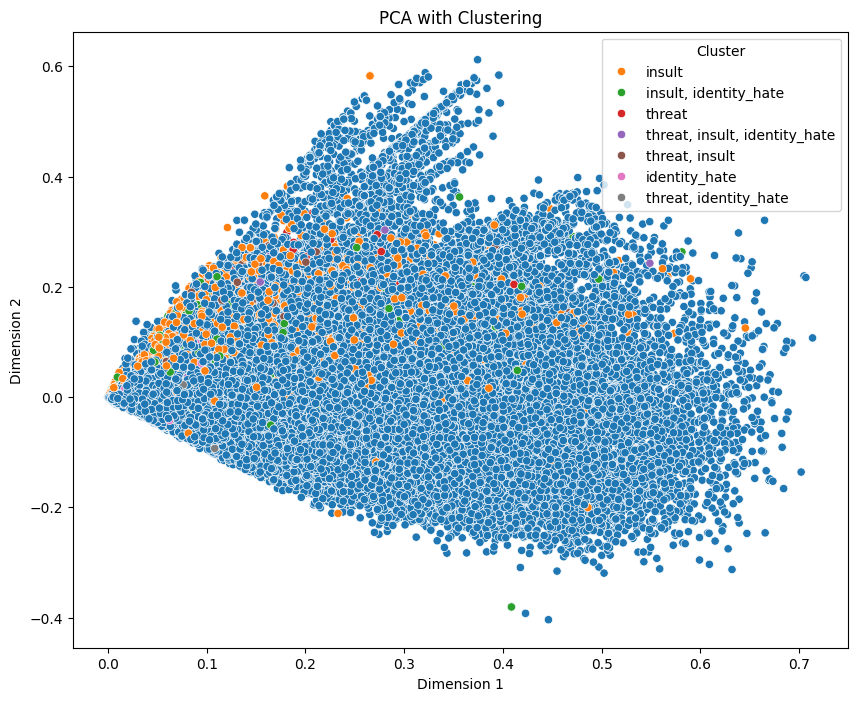

In [51]:
# using labels 
plt.figure(figsize=(10, 8))
#'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'
data_train['combined_labels'] = data_train[['threat', 'insult', 'identity_hate']].apply(
    lambda x: ', '.join(x.index[x == 1]), axis=1
)
df_pca['Label'] = data_train['combined_labels']
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Label', data=df_pca, palette='tab10')
plt.title('PCA with Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()

#  The graph shows the distribution of comments in a reduced 2D space (PCA) , where points represent comments(individu ), 
# and their position reflects their similarity in terms of word usage and TF-IDF features .



## Make classification

We will study during this project a small amount of models.

### Logistic regression

The logistic regression is the most simple and naïve model one can use for classification specifically, but it can provide good insights on the baseline one may wish to achieve with more complex models.

**Implement a logistic classifier. Justify every parameter that you choose and how you chose it.**

In [52]:
## logistic classifier 
# les commentaires toxiques.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

# X : Les commentaires transformés en vecteurs numériques avec TF-IDF
# X_tfidf est la matrice résultante de la transformation des commentaires en une représentation numérique 
# (chaque ligne est un commentaire, et chaque colonne représente un mot, avec les valeurs TF-IDF associées).
X_train = X_tfidf
# Y : Le label (binaire pour toxicité)
# Ici, nous utilisons la colonne 'toxic' de 'data_train' comme étiquette cible.
# Cette colonne contient des valeurs 0 ou 1, représentant si le commentaire est toxique ou non.
y_train = data_train["toxic"]
# Entraînement du modèle avec les données X_train (les vecteurs des commentaires)
# et y_train (les étiquettes correspondantes de toxicité).
model.fit(X_train, y_train)
# Après l'entraînement du modèle, on peut maintenant faire des prédictions sur de nouvelles données.


LogisticRegression(random_state=0, solver='liblinear')

In [53]:
# Affiche les classes que le modèle peut prédire.
# Cela montre les étiquettes de classification possibles (dans ce cas, 'toxic' ou 'non-toxic' pour un modèle binaire).
# présenter par la liste 0,1
print(model.classes_)
# Affiche l'ordonnée à l'origine du modèle (le biais).
print(model.intercept_)
# Affiche les coefficients du modèle pour chaque caractéristique (mot dans ce cas).
print(model.coef_)
# Affiche les probabilités d'appartenance à chaque classe pour chaque observation.
print(model.predict_proba(X_train))
# Prédit les classes pour chaque observation.
print(model.predict(X_train))
# Calcule le score de précision du modèle sur X_train et y_train.
print(model.score(X_train, y_train))




[0 1]
[-2.81898381]
[[ 0.2763175  -0.63167827 -0.07613173 ...  0.48115269 -0.17901504
   0.578226  ]]
[[0.99425842 0.00574158]
 [0.97511812 0.02488188]
 [0.97545883 0.02454117]
 ...
 [0.96880148 0.03119852]
 [0.98625595 0.01374405]
 [0.87320576 0.12679424]]
[0 0 0 ... 0 0 0]
0.9625558528805359


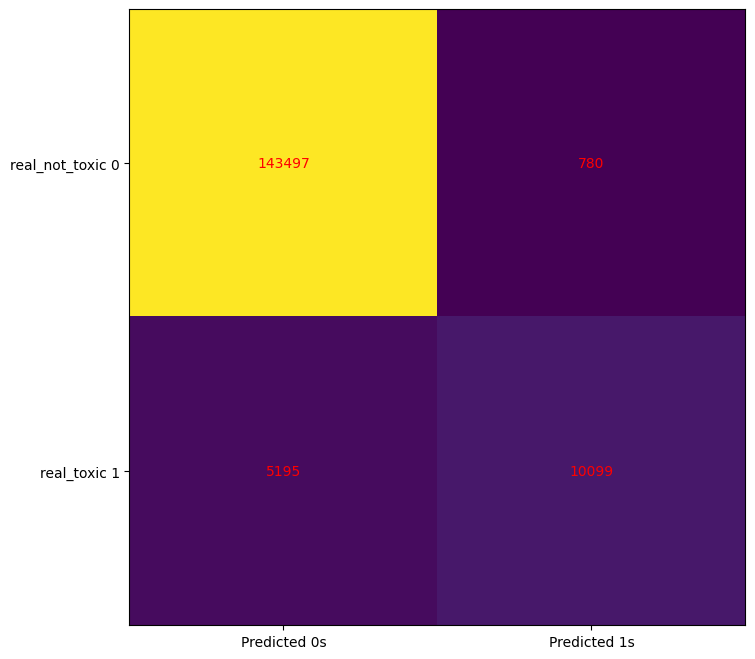

In [55]:
# Calcul de la matrice de confusion : compare les labels réels (y_train) avec les prédictions du modèle
cm = confusion_matrix(y_train, model.predict(X_train))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('real_not_toxic 0', 'real_toxic 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Le test 


In [56]:
#le test sur mes données de test 
# Prédis les probabilités pour les données de test
y_test = data_test_labels["toxic"]
# Faire des prédictions sur les données de test
y_pred_proba = model.predict_proba(X_test_tfidf)
y_pred = model.predict(X_test_tfidf)

# Évaluation des performances
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[    0 70516 18670]
 [    0 55635  2253]
 [    0  1838  4252]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     89186
           0       0.43      0.96      0.60     57888
           1       0.17      0.70      0.27      6090

    accuracy                           0.39    153164
   macro avg       0.20      0.55      0.29    153164
weighted avg       0.17      0.39      0.24    153164



/Users/pro/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pro/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pro/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dans cette section, nous appliquons le modèle à plusieurs sorties en utilisant le classificateur MultiOutputClassifier.

In [57]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Liste des étiquettes
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Données cibles multi-étiquettes (binaire pour chaque étiquette)
y_train = data_train[labels]

# Modèle multi-étiquette
multi_target_model = MultiOutputClassifier(LogisticRegression(solver='liblinear', random_state=0))

# Entraîner le modèle
multi_target_model.fit(X_train, y_train)

# Prédictions
y_pred_multi = multi_target_model.predict(X_test_tfidf)

# Initialiser un DataFrame pour stocker les résultats
results = []

# Évaluer chaque étiquette
for i, label in enumerate(labels):
    y_test = data_test_labels[labels]
    report = classification_report(
        y_test[label],
        y_pred_multi[:, i],
        zero_division=0,  # Évite les avertissements
        output_dict=True
    )
        # Calculer l'accuracy pour chaque étiquette
    accuracy = accuracy_score(y_test[label], y_pred_multi[:, i])
    
    # Ajouter les résultats principaux au tableau
    results.append({
        "Label": label,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
        "Accuracy": accuracy  # Ajouter l'accuracy à chaque étiquette
    })
# Afficher les résultats sous forme de tableau
results_df = pd.DataFrame(results)
print(results_df)


           Label  Precision    Recall  F1-Score  Accuracy
0          toxic   0.171004  0.390999  0.237063  0.390999
1   severe_toxic   0.173530  0.414869  0.244700  0.414869
2        obscene   0.172295  0.404162  0.241306  0.404162
3         threat   0.173809  0.416423  0.245203  0.416423
4         insult   0.169757  0.403071  0.238833  0.403071
5  identity_hate   0.172377  0.413772  0.243296  0.413772


Les classes predites 


In [58]:
# Maintenant, pour chaque commentaire, vous voulez imprimer l'étiquette qui a la plus haute probabilité ou la plus forte valeur de prédiction.
for i, pred in enumerate(y_pred_multi):
    # Trouver l'indice de la classe avec la plus haute probabilité
    pred_class = labels[pred.argmax()]
    print(f"Commentaire {i+1} : {pred_class}")

Commentaire 1 : toxic
Commentaire 2 : toxic
Commentaire 3 : toxic
Commentaire 4 : toxic
Commentaire 5 : toxic
Commentaire 6 : toxic
Commentaire 7 : toxic
Commentaire 8 : toxic
Commentaire 9 : toxic
Commentaire 10 : toxic
Commentaire 11 : toxic
Commentaire 12 : toxic
Commentaire 13 : toxic
Commentaire 14 : toxic
Commentaire 15 : toxic
Commentaire 16 : toxic
Commentaire 17 : toxic
Commentaire 18 : toxic
Commentaire 19 : toxic
Commentaire 20 : toxic
Commentaire 21 : toxic
Commentaire 22 : toxic
Commentaire 23 : toxic
Commentaire 24 : toxic
Commentaire 25 : toxic
Commentaire 26 : toxic
Commentaire 27 : toxic
Commentaire 28 : toxic
Commentaire 29 : toxic
Commentaire 30 : toxic
Commentaire 31 : toxic
Commentaire 32 : toxic
Commentaire 33 : toxic
Commentaire 34 : toxic
Commentaire 35 : toxic
Commentaire 36 : toxic
Commentaire 37 : toxic
Commentaire 38 : toxic
Commentaire 39 : obscene
Commentaire 40 : toxic
Commentaire 41 : toxic
Commentaire 42 : toxic
Commentaire 43 : toxic
Commentaire 44 : t

In [ ]:

# from sklearn.decomposition import TruncatedSVD
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, accuracy_score
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")
# test_labels = pd.read_csv("test_labels.csv")
# print(train.head())
# tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.9)
# # Transformer en matrice TF-IDF
# documents=train["comment_text"]
# X_tfidf = tfidf_vectorizer.fit_transform(documents)
# # Catégorie cible
# category = "toxic"
# # Appliquer le transformateur TF-IDF déjà ajusté
# X_test = tfidf_vectorizer.transform(test["comment_text"])

# print(f"\nTraining SVM for category: {category}")

# # Labels d'entraînement et de test pour la catégorie `toxic`
# y_train_category = train[category]
# y_test_category = test_labels[category]

# # Exclure les lignes invalides dans le jeu de test
# X_test_valid = X_test[y_test_category != -1]
# y_test_valid = y_test_category[y_test_category != -1]

# # Réduction de dimension avec TruncatedSVD
# svd = TruncatedSVD(n_components=300, random_state=42)
# X_tfidf_reduced = svd.fit_transform(X_tfidf)  # Réduire le jeu d'entraînement
# X_test_reduced = svd.transform(X_test_valid)  # Réduire le jeu de test valide

# # Initialiser et entraîner le modèle SVM
# svm_clf = SVC(kernel="linear", C=1.0, class_weight="balanced", random_state=42)
# svm_clf.fit(X_tfidf_reduced, y_train_category)

# # Prédire sur les données réduites
# y_pred_category = svm_clf.predict(X_test_reduced)

# # Évaluer les performances
# print("Accuracy:", accuracy_score(y_test_valid, y_pred_category))
# print("Classification Report:\n", classification_report(y_test_valid, y_pred_category))

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Training SVM for category: toxic


KeyboardInterrupt: 

## Other models

**Choose a model between the following:**
* **K-Nearest Neighbors (*KNN*)**
* **Decision Tree**
* **Random Forest**

**Describe IN YOUR OWN WORDS (plagiarism checks will be made if needed) how the method works, and implement it for the current case, discussing its hyperparameters as well.**

In [ ]:
## Write your code here

## Compare models

One must then compare the models on the test set and provide metrics to study it.

**Compare previously studied models, with counting *tf* and *tf-idf* as vectorizers, for their best hyperparameters.**

In [ ]:
## Write your code here

## Use your model

**Use the best model to build a Command-Line Interface (*CLI*) that is launched by the command `./cli.py [options]` using the `argsparse` module, and that accepts in stdin (standard input) english sentences and classifies them, displaying the result and interesting metrics if relevant.**